<h1>TASK 2</h1>

In [1]:
import pandas as pd

In [2]:
df2 = pd.read_excel('SA - Data for Task 2.xlsx')
df2.head()

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Not Charging - Alternator,No Component Mentioned - No Component Mentioned
3,SO0006642-1,SO0006642,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Faulty - Fan,"Tensioner - Removed, Crankshaft Pulley - Cleaned"
4,SO0018457-1,SO0018457,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Oil Loss - Not Mentioned,No Component Mentioned - No Component Mentioned


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    int64         
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    int64         
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

In [4]:
df2.nunique()

Primary Key                              500
Order No                                 232
Segment Number                            19
Order Date                                48
Manufacturer                               4
Model                                      9
Product Category                           5
Model Year                                 7
Serial Number                             40
Meter 1 Reading                           49
Complaint                                128
Cause                                     69
Correction                               125
Failure Condition - Failure Component    357
Fix Condition - Fix Component            371
dtype: int64

<h4>2.1 Data Cleaning </h4>

In [5]:
#changing column names to uppercase
df2.columns = [col.upper() for col in df2.columns]
df2.rename(columns={'FAILURE CONDITION - FAILURE COMPONENT':'FAILURE_CON_COMP','FIX CONDITION - FIX COMPONENT':'FIX_CON_COMP'}, inplace=True)
df2.rename(columns={'METER 1 READING':'MTR_RD'}, inplace=True)
#replace ' ' with '_' in column names
df2.columns = [col.replace(' ', '_') for col in df2.columns]

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PRIMARY_KEY       500 non-null    object        
 1   ORDER_NO          500 non-null    object        
 2   SEGMENT_NUMBER    500 non-null    int64         
 3   ORDER_DATE        500 non-null    datetime64[ns]
 4   MANUFACTURER      500 non-null    object        
 5   MODEL             500 non-null    object        
 6   PRODUCT_CATEGORY  500 non-null    object        
 7   MODEL_YEAR        500 non-null    int64         
 8   SERIAL_NUMBER     500 non-null    object        
 9   MTR_RD            500 non-null    float64       
 10  COMPLAINT         500 non-null    object        
 11  CAUSE             206 non-null    object        
 12  CORRECTION        475 non-null    object        
 13  FAILURE_CON_COMP  500 non-null    object        
 14  FIX_CON_COMP      500 non-

In [7]:
#cause column has too many null values > 50%
df2['CAUSE'].fillna('UNKNOWN', inplace=True)

/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/1494170743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CAUSE'].fillna('UNKNOWN', inplace=True)


In [8]:
#Correction column has categorical values
df2[df2['CORRECTION'].isna()==True]['COMPLAINT'].value_counts()
#No unique mapping found since all the values have NULL correction
#Hence imputing 'No Correction Provided' for null values in CORRECTION column
df2['CORRECTION'].fillna('No Correction Provided', inplace=True)

/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/4038700143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CORRECTION'].fillna('No Correction Provided', inplace=True)


In [9]:
#Formatting the Text columns to remove leading and trailing spaces
text_columns = ['COMPLAINT', 'CORRECTION', 'FAILURE_CON_COMP', 'FIX_CON_COMP']
for col in text_columns:
    df2[col] = df2[col].str.strip()
df2[text_columns].isna().sum()

COMPLAINT           0
CORRECTION          0
FAILURE_CON_COMP    0
FIX_CON_COMP        0
dtype: int64

In [10]:
#we change  textual categorical data description columns to lowercase to keep uniformity
categorical_cols = ['COMPLAINT','CORRECTION']
import re
#detect not english characters in these columns
def contains_non_english(text):
    if pd.isna(text):
        return False
    return bool(re.search(r'[^\x00-\x7F]', str(text)))
df2['has_non_english'] = False
df2['has_non_english'] |= df2['CORRECTION'].apply(contains_non_english)
df2['has_non_english'] |= df2['COMPLAINT'].apply(contains_non_english)
non_english_rows = df2[df2['has_non_english']]
print(len(non_english_rows))
print(non_english_rows[['CORRECTION', 'COMPLAINT','has_non_english']].head())

446
                                          CORRECTION  \
0  Als ich das Gerät in die Werkstatt fuhr, stieg...   
1  Als ich das Gerät in die Werkstatt fuhr, stieg...   
2  Als ich das Gerät in die Werkstatt fuhr, stieg...   
3  Als ich das Gerät in die Werkstatt fuhr, stieg...   
4  Als ich das Gerät in die Werkstatt fuhr, stieg...   

                                           COMPLAINT  has_non_english  
0  No cab heat, temp gauge dont get to operating ...             True  
1  No cab heat, temp gauge dont get to operating ...             True  
2  No cab heat, temp gauge dont get to operating ...             True  
3  No cab heat, temp gauge dont get to operating ...             True  
4  No cab heat, temp gauge dont get to operating ...             True  


In [11]:
from deep_translator import GoogleTranslator

def translate_to_english(text):
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    return GoogleTranslator(
        source="auto",
        target="en"
    ).translate(text)

#translated = translate_to_english("Bonjour")
#print(translated)

for idx, row in df2[df2['has_non_english']==True].iterrows():
    df2.at[idx, 'CORRECTION'] = translate_to_english(row['CORRECTION'])
    df2.at[idx, 'COMPLAINT'] = translate_to_english(row['COMPLAINT'])
   

/Users/manjarinandimajumdar/Documents/Axion_Tasks/Task2/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
#cosmetic changes to some categorical columns to retain alphanumeric format
def normalize_text(text):
    if not isinstance(text, str):
        return text
    
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)        # normalize spaces
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation
    return text.strip()

for col in categorical_cols:
    df2[col] = df2[col].apply(normalize_text)

In [13]:
df2.drop(columns=['has_non_english'], inplace=True)

In [14]:
import numpy as np
#now we convert to lowercase
for col in categorical_cols:
    df2[col].replace(np.nan, 'UNKNOWN', inplace=True)
    df2[col] = df2[col].str.lower()

/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/3666492259.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace(np.nan, 'UNKNOWN', inplace=True)


In [59]:
df2['FAILURE_CON_COMP'].replace(',','-', regex=True, inplace=True)

df2[["FAILURE_CON", "FAILURE_COMP"]] = (df2["FAILURE_CON_COMP"].str.split("-", n=1, expand=True))
df2['FIX_CON_COMP'].replace(',','-', regex=True, inplace=True)
df2[["FIX_CON", "FIX_COMP"]] = (df2["FIX_CON_COMP"].str.split("-", n=1, expand=True))


/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/3169034139.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['FIX_CON_COMP'].replace(',','-', regex=True, inplace=True)


In [60]:
df2.to_excel('cleaned_data_task2.xlsx',index=False)

<h4>Merging the two Datasets</h4>

In [16]:
df1 = pd.read_excel('cleaned_data_task1.xlsx')
df1.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,REPAIR_YEAR,REPAIR_MONTH,CONDITION_TAGS,COMPONENT_TAGS,SEVERITY_TAGS
0,3HCFDDE89SH220903,13021,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CCF,...,CF10543,1500,21,0,1,2024,1,Fitment/Alignment Issue,Steering Wheel Rim,Intermittent Severity
1,1HRFFEE8XSZ230636,13028,checked found dtcs u0229 u1530 set in bcm fo...,customer states heated steering wheel inop,2024-01-03,MODULE ASM-STRG WHL HT CONT,heated steering wheel module replacement,FullSizeTrucks,Crew Cab,T1CGF,...,TF10543,1500,10,0,1,2024,1,"Thermal/Heating Failure, Electrical/Electronic...","Steering Wheel Rim, Heating Module/Element",Functional Failure
2,1HYKSMRK6SZ000990,13035,approved 49olh for added diagnostics with tcsc...,owner reports the super cruise bar on the stee...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,steering wheel replacement,BEV,4 Door Utility,L233-LSOP,...,6MB26,Lux1,10,0,1,2024,1,Electrical/Electronic Failure,"Steering Wheel Rim, Controls/Switches, Horn Sy...",Persistent Issues
3,3HCFDFEL3SH241701,13021,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CCF,...,CF10543,1500,10,0,1,2024,1,"Surface Degradation, Fitment/Alignment Issue",Steering Wheel Rim,Cosmetic Issue
4,1HRFFHEL1RZ181474,13021,replaced steering message no longer displayed,cs customer states the service driver assist s...,2024-01-05,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CGF,...,TF10543,1500,10,0,1,2024,1,General Investigation,ADAS/SuperCruise,Intermittent Severity


In [97]:
#Merging both dataframes on SRC_TXN_ID and PRIMARY_KEY columns
#We have no matching keys in both dataframes
#Only full outer join will retain all records from both dataframes
df1['SRC_TXN_ID'] = df1['SRC_TXN_ID'].astype(str)
df2['PRIMARY_KEY'] = df2['PRIMARY_KEY'].astype(str)
merged_df = pd.merge(df1, df2, left_on='SRC_TXN_ID', right_on='PRIMARY_KEY', how='outer', indicator=True)

In [100]:
merged_df.columns
#merged_df.drop(columns=['_merge'], inplace=True)

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'REPAIRING_DEALER_CODE', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE',
       'REPAIR_YEAR', 'R

In [101]:
merged_df.rename(columns={'PRIMARY_KEY':'DATA2_PK2'}, inplace=True)
#merged_df.drop(columns=['PRIMARY_KEY'], inplace=True)
merged_df["PRIMARY_KEY"] = (merged_df["SRC_TXN_ID"].astype(str) + "0"+ merged_df["DATA2_PK2"].astype(str))

#We set categorical null values to 'UNKNOWN' for uniformity
#We set numerical null values to -1
merged_df.fillna({'COMPLAINT':'UNKNOWN', 'CORRECTION':'UNKNOWN', 'CAUSE':'UNKNOWN', 'FAILURE_CON_COMP':'UNKNOWN', 'FIX_CON_COMP':'UNKNOWN', 'MTR_RD':-1}, inplace=True)

In [102]:
# Create a common component name column
merged_df['COMMON_COMP'] = merged_df['COMPONENT_TAGS'].fillna(merged_df['FAILURE_COMP'])
merged_df['COMMON_COMP'] = merged_df['COMPONENT_TAGS'].fillna(merged_df['FIX_COMP'])

# Create a common condition/failure column
merged_df['COMMON_CON'] = merged_df['CONDITION_TAGS'].fillna(merged_df['FAILURE_CON'])
merged_df['COMMON_CON'] = merged_df['CONDITION_TAGS'].fillna(merged_df['FIX_CON'])

merged_df['COMMON_COMP'] = merged_df['COMMON_COMP'].str.strip()
merged_df['COMMON_CON'] = merged_df['COMMON_CON'].str.strip()

In [103]:
merged_df.to_excel('merged_data_task2and3.xlsx', index=False)

<h1>TASK 3</h1>

<h4>Exploratory Data Analysis _ Trend Analysis</h4>

In [104]:
merged_df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,CORRECTION,FAILURE_CON_COMP,FIX_CON_COMP,FAILURE_CON,FAILURE_COMP,FIX_CON,FIX_COMP,PRIMARY_KEY,COMMON_COMP,COMMON_CON
0,1HRFFEE8XSZ230636,13028.0,checked found dtcs u0229 u1530 set in bcm fo...,customer states heated steering wheel inop,2024-01-03,MODULE ASM-STRG WHL HT CONT,heated steering wheel module replacement,FullSizeTrucks,Crew Cab,T1CGF,...,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,28088419100nan,"Steering Wheel Rim, Heating Module/Element","Thermal/Heating Failure, Electrical/Electronic..."
1,3HCFDFED4SH352945,13021.0,replaced steering wheel,special order part steering wheel heated stee...,2024-01-05,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CCF,...,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,28088822870nan,Steering Wheel Rim,"Thermal/Heating Failure, Electrical/Electronic..."
2,3HCFDFEL3SH241701,13021.0,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CCF,...,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,28088922880nan,Steering Wheel Rim,"Surface Degradation, Fitment/Alignment Issue"
3,1HRFFHEL1RZ181474,13021.0,replaced steering message no longer displayed,cs customer states the service driver assist s...,2024-01-05,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CGF,...,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,28089018820nan,ADAS/SuperCruise,General Investigation
4,3HCFDDE89SH220903,13021.0,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,WHEEL ASM-STRG *JET BLACK,steering wheel replacement,FullSizeTrucks,Crew Cab,T1CCF,...,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,28089082190nan,Steering Wheel Rim,Fitment/Alignment Issue


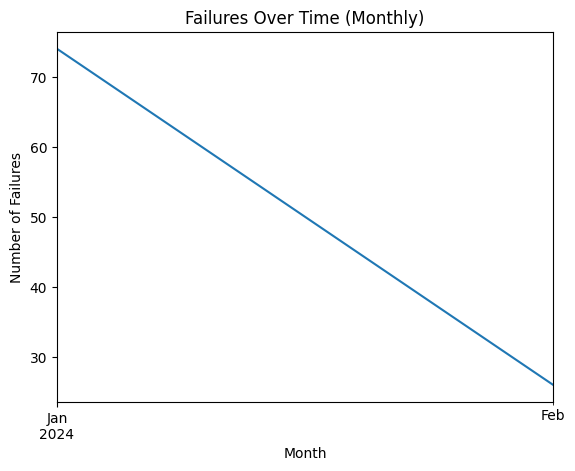

In [105]:
import matplotlib.pyplot as plt
import numpy as np
#1. Trend: failures over time
df_time = merged_df[merged_df[['REPAIR_DATE','ORDER_DATE']].notna()].copy()
failures_over_time = df_time.groupby(df_time["REPAIR_DATE"].dt.to_period("M")).size()
plt.figure()
failures_over_time.plot()
plt.title("Failures Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Failures")
plt.show()

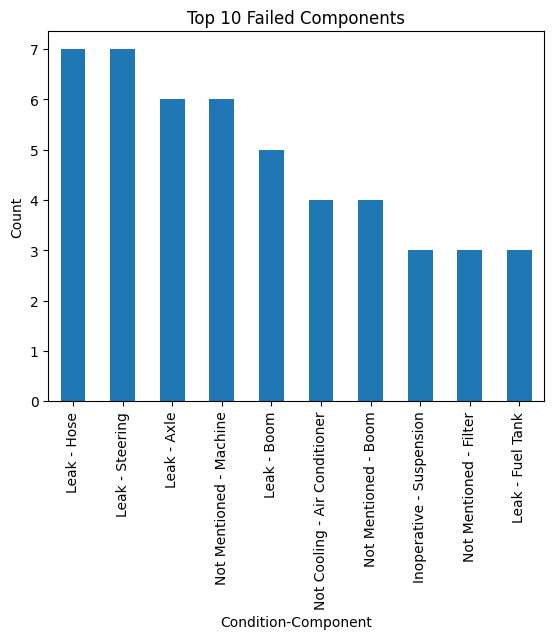

In [107]:
#2. Distribution of failure types
failed_comp = merged_df[merged_df["FAILURE_CON_COMP"].notna()]
exclude_values = ["UNKNOWN","Not Mentioned - Not Mentioned","Not Mentioned - No Component Mentioned"]
failed_comp = failed_comp[~failed_comp["FAILURE_CON_COMP"].isin(exclude_values)]
top_components = failed_comp["FAILURE_CON_COMP"].value_counts().head(10)

plt.figure()
top_components.plot(kind="bar")
plt.title("Top 10 Failed Components")
plt.xlabel("Condition-Component")
plt.ylabel("Count")
plt.show()


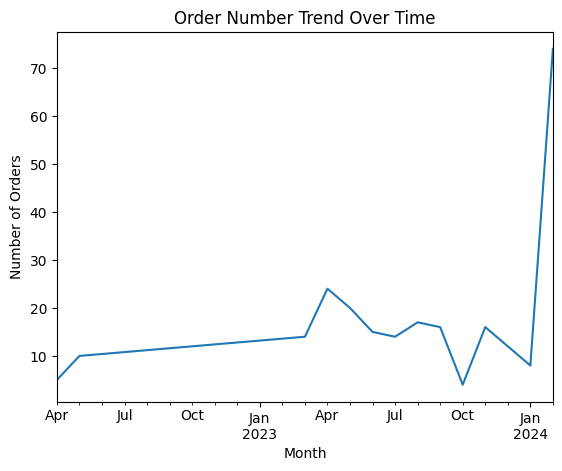

In [ ]:
#3. Number of Orders Trend
order_df = merged_df.dropna(subset=["ORDER_DATE", "ORDER_NO"])

order_trend = (
    order_df
    .groupby(order_df["ORDER_DATE"].dt.to_period("M"))["ORDER_NO"]
    .nunique()
)

plt.figure()
order_trend.plot()
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Order Number Trend Over Time")
plt.show()

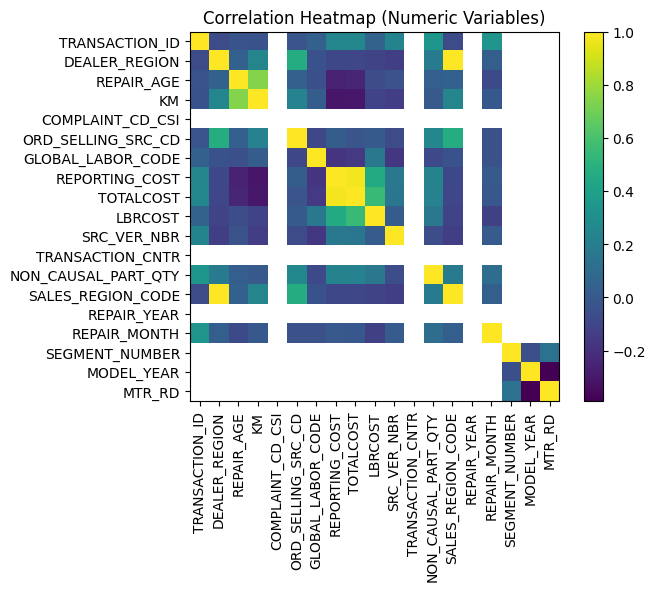

In [ ]:
#4. Numerical Values Correlation HeatMap 
numeric_df = merged_df.select_dtypes(include=[np.number]).dropna(axis=1, how="all")
corr = numeric_df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Variables)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/217651459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['Common_Date'] = pd.to_datetime(filtered_df['REPAIR_DATE'].fillna(filtered_df['ORDER_DATE']))
/var/folders/kq/5d1ybk2j77s0zcxwt6x1wt2m0000gn/T/ipykernel_81979/217651459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['Month_Year'] = heatmap_df['Common_Date'].dt.to_period('M').astype(str)


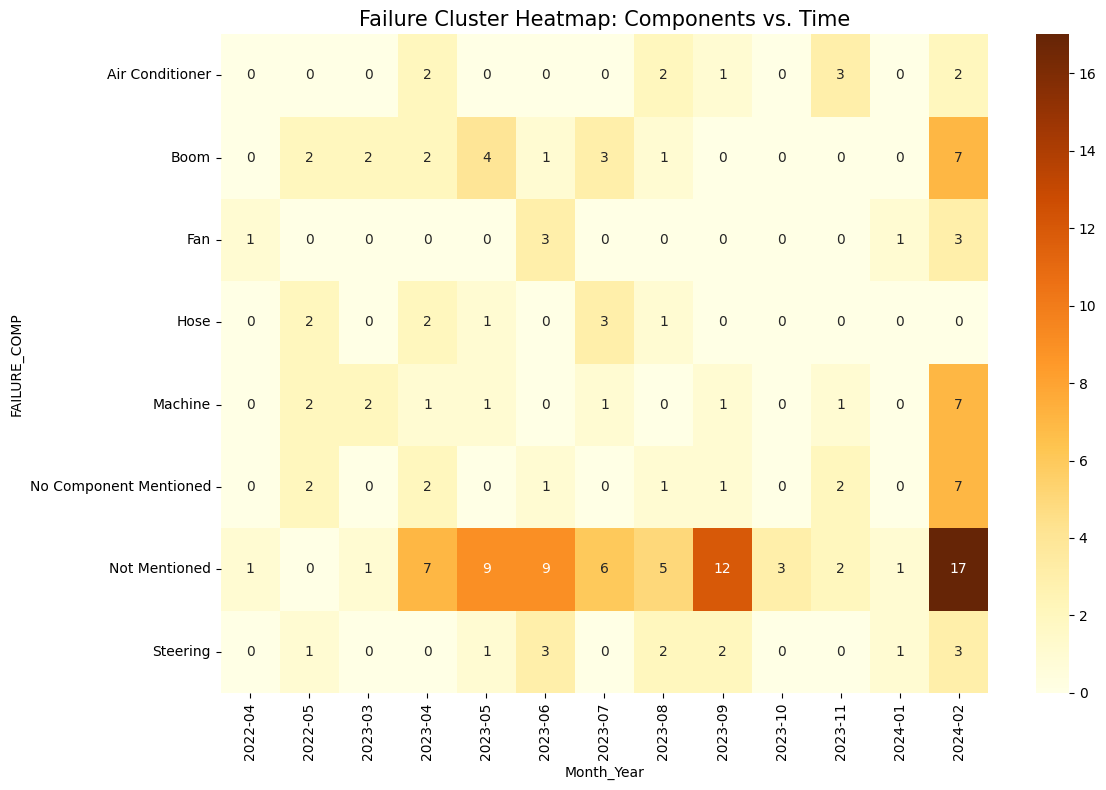

In [ ]:
#5. Failure Cluster Heatmap: Components vs. Time
import seaborn as sns
exclude_vals = [" Not Mentioned", " No Component Mentioned"]
filtered_df = merged_df[~merged_df["FAILURE_COMP"].isin(exclude_vals)]
top_comps = filtered_df['FAILURE_COMP'].value_counts().head(8).index
heatmap_df = filtered_df[filtered_df['FAILURE_COMP'].isin(top_comps)]
heatmap_df['Common_Date'] = pd.to_datetime(filtered_df['REPAIR_DATE'].fillna(filtered_df['ORDER_DATE']))
heatmap_df['Month_Year'] = heatmap_df['Common_Date'].dt.to_period('M').astype(str)
pivot_table = heatmap_df.pivot_table(index='FAILURE_COMP', columns='Month_Year', values='Common_Date', aggfunc='count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr', fmt='g')
plt.title('Failure Cluster Heatmap: Components vs. Time', fontsize=15)
plt.tight_layout()

<h4>Root Cause Analysis</h4>

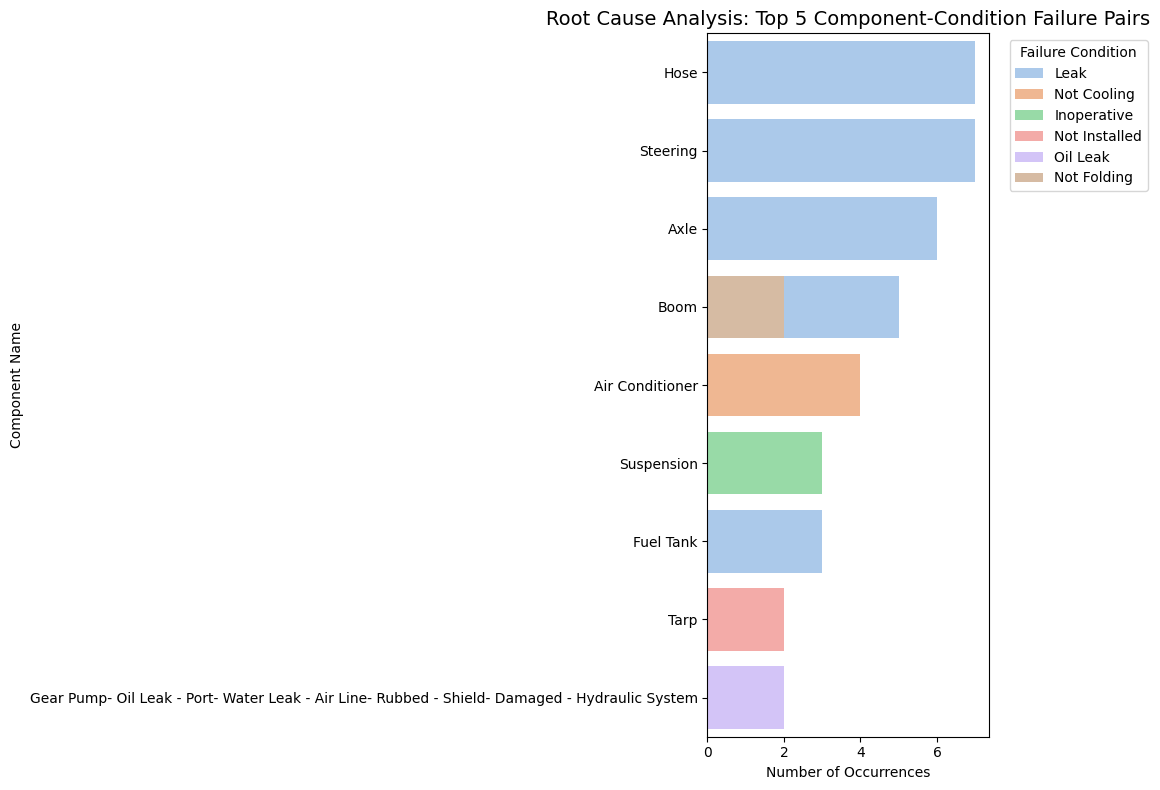

In [ ]:
#6. The cause of failure analysis

df_filtered = merged_df[~merged_df["FAILURE_COMP"].str.contains(r"Not Mentioned|No Component Mentioned|UNKNOWN",case=False,na=False)]
df_filtered = merged_df[~merged_df["FAILURE_CON"].str.contains(r"Not Mentioned|No Component Mentioned|UNKNOWN",case=False,na=False)]
rca_summary = df_filtered.groupby(['FAILURE_COMP', 'FAILURE_CON']).size().reset_index(name='Frequency')
rca_summary = rca_summary.sort_values('Frequency', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=rca_summary, x='Frequency', y='FAILURE_COMP', hue='FAILURE_CON', dodge=False, palette='pastel')
plt.title('Root Cause Analysis: Top 5 Component-Condition Failure Pairs', fontsize=14)
plt.xlabel('Number of Occurrences')
plt.ylabel('Component Name')
plt.legend(title='Failure Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


